# Description

Runs gaussian mixture model on the pca version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 70000

## Input data

In [6]:
INPUT_SUBSET = "pca"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

## Clustering

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=70000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=70001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 50)

In [20]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.547515,-0.007250,0.245361,0.132424,1.201447,-0.113158,0.048859,1.031679,0.711208,0.126100,...,0.113685,-0.109753,0.178202,-0.487868,1.805920,-0.342611,-0.663712,-1.313987,-1.481707,0.396410
100002_raw-Energy,-1.570593,-0.618992,-1.223395,1.627321,-0.563860,0.224922,-1.500327,2.045633,-1.665998,-0.180432,...,0.697880,1.412676,2.103988,0.385625,2.386495,-2.939998,-0.978275,-1.893307,-0.259497,0.423264
100003_raw-Protein,-0.601212,-0.948824,-1.022209,2.438433,-2.062235,0.356202,-1.538038,2.314675,-1.108991,0.318034,...,0.171992,1.351979,0.054404,-0.725132,2.226520,-3.481674,-0.445294,-0.477452,0.237157,1.440867
100004_raw-Fat,-1.648214,-0.342042,-0.270189,1.683268,-1.222401,0.018349,-0.032824,1.671161,-0.908965,0.224100,...,-0.358812,0.696836,1.072624,0.627951,1.802000,0.174704,0.826319,-0.826992,0.596113,0.620050
100005_raw-Carbohydrate,-1.867586,-0.006412,-0.303220,0.770958,-0.116822,0.460946,-2.407732,1.534273,-1.930577,0.064621,...,1.332852,1.978032,2.158456,0.831123,1.093202,-3.539033,-0.831862,-0.842298,-0.723072,0.359438


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensemble import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:02<11:15,  2.30s/it]

  1%|          | 2/295 [00:04<11:00,  2.26s/it]

  1%|          | 3/295 [00:06<11:06,  2.28s/it]

  1%|▏         | 4/295 [00:09<11:03,  2.28s/it]

  2%|▏         | 5/295 [00:11<11:00,  2.28s/it]

  2%|▏         | 6/295 [00:13<10:35,  2.20s/it]

  2%|▏         | 7/295 [00:15<09:59,  2.08s/it]

  3%|▎         | 8/295 [00:16<09:33,  2.00s/it]

  3%|▎         | 9/295 [00:18<09:03,  1.90s/it]

  3%|▎         | 10/295 [00:20<09:05,  1.91s/it]

  4%|▎         | 11/295 [00:22<08:57,  1.89s/it]

  4%|▍         | 12/295 [00:24<08:57,  1.90s/it]

  4%|▍         | 13/295 [00:26<08:55,  1.90s/it]

  5%|▍         | 14/295 [00:28<08:46,  1.88s/it]

  5%|▌         | 15/295 [00:29<08:39,  1.85s/it]

  5%|▌         | 16/295 [00:32<09:17,  2.00s/it]

  6%|▌         | 17/295 [00:34<09:25,  2.04s/it]

  6%|▌         | 18/295 [00:36<09:19,  2.02s/it]

  6%|▋         | 19/295 [00:38<09:57,  2.17s/it]

  7%|▋         | 20/295 [00:40<09:45,  2.13s/it]

  7%|▋         | 21/295 [00:43<10:02,  2.20s/it]

  7%|▋         | 22/295 [00:45<10:11,  2.24s/it]

  8%|▊         | 23/295 [00:48<10:30,  2.32s/it]

  8%|▊         | 24/295 [00:50<10:54,  2.42s/it]

  8%|▊         | 25/295 [00:53<10:57,  2.44s/it]

  9%|▉         | 26/295 [00:56<12:08,  2.71s/it]

  9%|▉         | 27/295 [00:59<12:28,  2.79s/it]

  9%|▉         | 28/295 [01:02<12:29,  2.81s/it]

 10%|▉         | 29/295 [01:05<13:13,  2.98s/it]

 10%|█         | 30/295 [01:08<12:56,  2.93s/it]

 11%|█         | 31/295 [01:12<13:56,  3.17s/it]

 11%|█         | 32/295 [01:15<13:51,  3.16s/it]

 11%|█         | 33/295 [01:18<14:02,  3.22s/it]

 12%|█▏        | 34/295 [01:22<14:10,  3.26s/it]

 12%|█▏        | 35/295 [01:25<14:29,  3.35s/it]

 12%|█▏        | 36/295 [01:30<16:35,  3.84s/it]

 13%|█▎        | 37/295 [01:35<17:18,  4.02s/it]

 13%|█▎        | 38/295 [01:39<17:26,  4.07s/it]

 13%|█▎        | 39/295 [01:44<19:16,  4.52s/it]

 14%|█▎        | 40/295 [01:48<17:58,  4.23s/it]

 14%|█▍        | 41/295 [01:53<18:46,  4.44s/it]

 14%|█▍        | 42/295 [01:58<20:06,  4.77s/it]

 15%|█▍        | 43/295 [02:05<21:49,  5.20s/it]

 15%|█▍        | 44/295 [02:10<22:07,  5.29s/it]

 15%|█▌        | 45/295 [02:15<20:57,  5.03s/it]

 16%|█▌        | 46/295 [02:19<20:46,  5.00s/it]

 16%|█▌        | 47/295 [02:26<23:07,  5.60s/it]

 16%|█▋        | 48/295 [02:33<23:48,  5.78s/it]

 17%|█▋        | 49/295 [02:38<22:43,  5.54s/it]

 17%|█▋        | 50/295 [02:46<26:27,  6.48s/it]

 17%|█▋        | 51/295 [02:56<29:57,  7.37s/it]

 18%|█▊        | 52/295 [03:03<29:40,  7.33s/it]

 18%|█▊        | 53/295 [03:09<27:40,  6.86s/it]

 18%|█▊        | 54/295 [03:16<27:44,  6.91s/it]

 19%|█▊        | 55/295 [03:25<30:43,  7.68s/it]

 19%|█▉        | 56/295 [03:37<34:58,  8.78s/it]

 19%|█▉        | 57/295 [03:47<36:33,  9.22s/it]

 20%|█▉        | 58/295 [03:56<36:14,  9.18s/it]

 20%|██        | 59/295 [04:04<35:00,  8.90s/it]

 20%|██        | 60/295 [04:10<31:27,  8.03s/it]

 21%|██        | 61/295 [04:24<38:12,  9.80s/it]

 21%|██        | 62/295 [04:35<39:14, 10.10s/it]

 21%|██▏       | 63/295 [04:46<39:54, 10.32s/it]

 22%|██▏       | 64/295 [04:55<38:19,  9.95s/it]

 22%|██▏       | 65/295 [05:05<38:38, 10.08s/it]

 22%|██▏       | 66/295 [05:18<41:48, 10.96s/it]

 23%|██▎       | 67/295 [05:27<39:26, 10.38s/it]

 23%|██▎       | 68/295 [05:36<37:32,  9.92s/it]

 23%|██▎       | 69/295 [05:47<38:12, 10.14s/it]

 24%|██▎       | 70/295 [05:58<39:22, 10.50s/it]

 24%|██▍       | 71/295 [06:13<44:06, 11.82s/it]

 24%|██▍       | 72/295 [06:30<49:54, 13.43s/it]

 25%|██▍       | 73/295 [06:42<47:49, 12.93s/it]

 25%|██▌       | 74/295 [06:56<48:30, 13.17s/it]

 25%|██▌       | 75/295 [07:11<50:35, 13.80s/it]

 26%|██▌       | 76/295 [07:26<51:45, 14.18s/it]

 26%|██▌       | 77/295 [07:44<55:09, 15.18s/it]

 26%|██▋       | 78/295 [07:55<50:31, 13.97s/it]

 27%|██▋       | 79/295 [08:13<54:34, 15.16s/it]

 27%|██▋       | 80/295 [08:29<55:48, 15.57s/it]

 27%|██▋       | 81/295 [08:48<58:47, 16.49s/it]

 28%|██▊       | 82/295 [09:06<1:00:29, 17.04s/it]

 28%|██▊       | 83/295 [09:23<1:00:11, 17.03s/it]

 28%|██▊       | 84/295 [09:41<1:00:42, 17.26s/it]

 29%|██▉       | 85/295 [10:01<1:02:54, 17.97s/it]

 29%|██▉       | 86/295 [10:19<1:02:45, 18.02s/it]

 29%|██▉       | 87/295 [10:39<1:04:42, 18.67s/it]

 30%|██▉       | 88/295 [11:00<1:06:56, 19.40s/it]

 30%|███       | 89/295 [11:22<1:09:03, 20.11s/it]

 31%|███       | 90/295 [11:44<1:10:40, 20.68s/it]

 31%|███       | 91/295 [12:10<1:16:22, 22.46s/it]

 31%|███       | 92/295 [12:31<1:14:09, 21.92s/it]

 32%|███▏      | 93/295 [12:53<1:14:17, 22.07s/it]

 32%|███▏      | 94/295 [13:18<1:16:01, 22.69s/it]

 32%|███▏      | 95/295 [13:43<1:18:02, 23.41s/it]

 33%|███▎      | 96/295 [14:11<1:22:32, 24.88s/it]

 33%|███▎      | 97/295 [14:31<1:17:43, 23.55s/it]

 33%|███▎      | 98/295 [14:56<1:18:10, 23.81s/it]

 34%|███▎      | 99/295 [15:18<1:16:35, 23.45s/it]

 34%|███▍      | 100/295 [15:39<1:12:57, 22.45s/it]

 34%|███▍      | 101/295 [16:07<1:18:10, 24.18s/it]

 35%|███▍      | 102/295 [16:34<1:20:59, 25.18s/it]

 35%|███▍      | 103/295 [16:59<1:20:21, 25.11s/it]

 35%|███▌      | 104/295 [17:32<1:27:05, 27.36s/it]

 36%|███▌      | 105/295 [17:58<1:25:05, 26.87s/it]

 36%|███▌      | 106/295 [18:28<1:28:01, 27.95s/it]

 36%|███▋      | 107/295 [18:54<1:26:09, 27.50s/it]

 37%|███▋      | 108/295 [19:22<1:25:42, 27.50s/it]

 37%|███▋      | 109/295 [19:47<1:22:54, 26.74s/it]

 37%|███▋      | 110/295 [20:17<1:25:51, 27.85s/it]

 38%|███▊      | 111/295 [20:45<1:25:36, 27.92s/it]

 38%|███▊      | 112/295 [21:13<1:24:39, 27.76s/it]

 38%|███▊      | 113/295 [21:44<1:27:00, 28.68s/it]

 39%|███▊      | 114/295 [22:13<1:26:43, 28.75s/it]

 39%|███▉      | 115/295 [22:45<1:29:40, 29.89s/it]

 39%|███▉      | 116/295 [23:18<1:31:37, 30.71s/it]

 40%|███▉      | 117/295 [23:51<1:33:43, 31.59s/it]

 40%|████      | 118/295 [24:21<1:31:37, 31.06s/it]

 40%|████      | 119/295 [24:55<1:33:48, 31.98s/it]

 41%|████      | 120/295 [25:33<1:38:12, 33.67s/it]

 41%|████      | 121/295 [26:05<1:36:30, 33.28s/it]

 41%|████▏     | 122/295 [26:38<1:35:51, 33.24s/it]

 42%|████▏     | 123/295 [27:15<1:38:30, 34.36s/it]

 42%|████▏     | 124/295 [27:49<1:37:18, 34.15s/it]

 42%|████▏     | 125/295 [28:23<1:36:51, 34.19s/it]

 43%|████▎     | 126/295 [29:05<1:42:40, 36.45s/it]

 43%|████▎     | 127/295 [29:36<1:37:17, 34.75s/it]

 43%|████▎     | 128/295 [30:12<1:38:03, 35.23s/it]

 44%|████▎     | 129/295 [30:50<1:39:39, 36.02s/it]

 44%|████▍     | 130/295 [31:24<1:37:04, 35.30s/it]

 44%|████▍     | 131/295 [32:02<1:38:52, 36.17s/it]

 45%|████▍     | 132/295 [32:38<1:38:08, 36.13s/it]

 45%|████▌     | 133/295 [33:16<1:38:42, 36.56s/it]

 45%|████▌     | 134/295 [33:51<1:37:18, 36.26s/it]

 46%|████▌     | 135/295 [34:31<1:39:23, 37.27s/it]

 46%|████▌     | 136/295 [35:09<1:39:36, 37.59s/it]

 46%|████▋     | 137/295 [35:43<1:35:53, 36.41s/it]

 47%|████▋     | 138/295 [36:26<1:40:35, 38.44s/it]

 47%|████▋     | 139/295 [37:02<1:37:54, 37.66s/it]

 47%|████▋     | 140/295 [37:43<1:40:14, 38.80s/it]

 48%|████▊     | 141/295 [38:23<1:40:39, 39.22s/it]

 48%|████▊     | 142/295 [39:06<1:42:50, 40.33s/it]

 48%|████▊     | 143/295 [39:51<1:45:20, 41.58s/it]

 49%|████▉     | 144/295 [40:32<1:44:31, 41.54s/it]

 49%|████▉     | 145/295 [41:12<1:42:21, 40.94s/it]

 49%|████▉     | 146/295 [41:51<1:40:40, 40.54s/it]

 50%|████▉     | 147/295 [42:29<1:37:35, 39.56s/it]

 50%|█████     | 148/295 [43:15<1:41:34, 41.46s/it]

 51%|█████     | 149/295 [43:54<1:39:43, 40.98s/it]

 51%|█████     | 150/295 [44:40<1:42:42, 42.50s/it]

 51%|█████     | 151/295 [45:27<1:44:37, 43.60s/it]

 52%|█████▏    | 152/295 [46:16<1:47:48, 45.23s/it]

 52%|█████▏    | 153/295 [47:02<1:47:28, 45.41s/it]

 52%|█████▏    | 154/295 [47:52<1:49:58, 46.80s/it]

 53%|█████▎    | 155/295 [48:45<1:53:47, 48.77s/it]

 53%|█████▎    | 156/295 [49:34<1:52:54, 48.74s/it]

 53%|█████▎    | 157/295 [50:16<1:47:38, 46.80s/it]

 54%|█████▎    | 158/295 [51:04<1:47:52, 47.24s/it]

 54%|█████▍    | 159/295 [51:47<1:44:16, 46.01s/it]

 54%|█████▍    | 160/295 [52:39<1:47:32, 47.79s/it]

 55%|█████▍    | 161/295 [53:29<1:48:17, 48.49s/it]

 55%|█████▍    | 162/295 [54:19<1:48:03, 48.75s/it]

 55%|█████▌    | 163/295 [55:06<1:46:25, 48.37s/it]

 56%|█████▌    | 164/295 [55:58<1:48:03, 49.49s/it]

 56%|█████▌    | 165/295 [56:45<1:45:32, 48.71s/it]

 56%|█████▋    | 166/295 [57:33<1:44:25, 48.57s/it]

 57%|█████▋    | 167/295 [58:27<1:46:42, 50.02s/it]

 57%|█████▋    | 168/295 [59:10<1:41:16, 47.85s/it]

 57%|█████▋    | 169/295 [1:00:01<1:42:56, 49.02s/it]

 58%|█████▊    | 170/295 [1:00:53<1:43:39, 49.76s/it]

 58%|█████▊    | 171/295 [1:01:38<1:39:55, 48.35s/it]

 58%|█████▊    | 172/295 [1:02:27<1:39:25, 48.50s/it]

 59%|█████▊    | 173/295 [1:03:17<1:39:58, 49.17s/it]

 59%|█████▉    | 174/295 [1:04:08<1:39:48, 49.50s/it]

 59%|█████▉    | 175/295 [1:04:56<1:38:20, 49.17s/it]

 60%|█████▉    | 176/295 [1:05:45<1:37:03, 48.94s/it]

 60%|██████    | 177/295 [1:06:34<1:36:40, 49.16s/it]

 60%|██████    | 178/295 [1:07:27<1:38:07, 50.32s/it]

 61%|██████    | 179/295 [1:08:23<1:40:34, 52.03s/it]

 61%|██████    | 180/295 [1:09:16<1:39:57, 52.15s/it]

 61%|██████▏   | 181/295 [1:10:02<1:35:37, 50.33s/it]

 62%|██████▏   | 182/295 [1:10:58<1:38:06, 52.09s/it]

 62%|██████▏   | 183/295 [1:11:42<1:32:45, 49.69s/it]

 62%|██████▏   | 184/295 [1:12:37<1:34:52, 51.29s/it]

 63%|██████▎   | 185/295 [1:13:31<1:35:16, 51.97s/it]

 63%|██████▎   | 186/295 [1:14:29<1:37:54, 53.89s/it]

 63%|██████▎   | 187/295 [1:15:19<1:35:04, 52.82s/it]

 64%|██████▎   | 188/295 [1:16:09<1:32:30, 51.87s/it]

 64%|██████▍   | 189/295 [1:16:57<1:29:29, 50.66s/it]

 64%|██████▍   | 190/295 [1:17:53<1:31:22, 52.21s/it]

 65%|██████▍   | 191/295 [1:18:51<1:33:46, 54.10s/it]

 65%|██████▌   | 192/295 [1:19:42<1:30:59, 53.00s/it]

 65%|██████▌   | 193/295 [1:20:33<1:29:21, 52.56s/it]

 66%|██████▌   | 194/295 [1:21:26<1:28:36, 52.64s/it]

 66%|██████▌   | 195/295 [1:22:10<1:23:20, 50.01s/it]

 66%|██████▋   | 196/295 [1:23:04<1:24:25, 51.16s/it]

 67%|██████▋   | 197/295 [1:23:57<1:24:42, 51.86s/it]

 67%|██████▋   | 198/295 [1:24:49<1:23:44, 51.80s/it]

 67%|██████▋   | 199/295 [1:25:50<1:27:36, 54.75s/it]

 68%|██████▊   | 200/295 [1:26:37<1:23:00, 52.43s/it]

 68%|██████▊   | 201/295 [1:27:31<1:22:25, 52.61s/it]

 68%|██████▊   | 202/295 [1:28:23<1:21:34, 52.63s/it]

 69%|██████▉   | 203/295 [1:29:16<1:20:33, 52.54s/it]

 69%|██████▉   | 204/295 [1:30:04<1:17:43, 51.24s/it]

 69%|██████▉   | 205/295 [1:31:03<1:20:20, 53.56s/it]

 70%|██████▉   | 206/295 [1:31:54<1:18:23, 52.85s/it]

 70%|███████   | 207/295 [1:32:48<1:18:01, 53.20s/it]

 71%|███████   | 208/295 [1:33:50<1:21:01, 55.88s/it]

 71%|███████   | 209/295 [1:34:45<1:19:44, 55.64s/it]

 71%|███████   | 210/295 [1:35:42<1:19:26, 56.08s/it]

 72%|███████▏  | 211/295 [1:36:39<1:18:45, 56.26s/it]

 72%|███████▏  | 212/295 [1:37:27<1:14:34, 53.92s/it]

 72%|███████▏  | 213/295 [1:38:22<1:14:10, 54.27s/it]

 73%|███████▎  | 214/295 [1:39:17<1:13:30, 54.45s/it]

 73%|███████▎  | 215/295 [1:40:10<1:11:54, 53.93s/it]

 73%|███████▎  | 216/295 [1:41:04<1:10:55, 53.86s/it]

 74%|███████▎  | 217/295 [1:41:51<1:07:33, 51.97s/it]

 74%|███████▍  | 218/295 [1:42:45<1:07:17, 52.44s/it]

 74%|███████▍  | 219/295 [1:43:45<1:09:29, 54.87s/it]

 75%|███████▍  | 220/295 [1:44:38<1:07:55, 54.34s/it]

 75%|███████▍  | 221/295 [1:45:40<1:09:42, 56.52s/it]

 75%|███████▌  | 222/295 [1:46:35<1:08:11, 56.04s/it]

 76%|███████▌  | 223/295 [1:47:32<1:07:28, 56.22s/it]

 76%|███████▌  | 224/295 [1:48:18<1:02:57, 53.20s/it]

 76%|███████▋  | 225/295 [1:49:16<1:03:56, 54.81s/it]

 77%|███████▋  | 226/295 [1:50:14<1:04:09, 55.80s/it]

 77%|███████▋  | 227/295 [1:51:22<1:07:05, 59.19s/it]

 77%|███████▋  | 228/295 [1:52:18<1:05:14, 58.43s/it]

 78%|███████▊  | 229/295 [1:53:07<1:01:01, 55.47s/it]

 78%|███████▊  | 230/295 [1:54:01<59:45, 55.15s/it]  

 78%|███████▊  | 231/295 [1:54:56<58:35, 54.93s/it]

 79%|███████▊  | 232/295 [1:55:57<59:35, 56.76s/it]

 79%|███████▉  | 233/295 [1:56:53<58:35, 56.70s/it]

 79%|███████▉  | 234/295 [1:57:55<59:09, 58.19s/it]

 80%|███████▉  | 235/295 [1:58:50<57:24, 57.40s/it]

 80%|████████  | 236/295 [1:59:50<57:10, 58.14s/it]

 80%|████████  | 237/295 [2:00:40<53:52, 55.74s/it]

 81%|████████  | 238/295 [2:01:33<51:57, 54.69s/it]

 81%|████████  | 239/295 [2:02:34<52:54, 56.69s/it]

 81%|████████▏ | 240/295 [2:03:26<50:42, 55.32s/it]

 82%|████████▏ | 241/295 [2:04:27<51:09, 56.84s/it]

 82%|████████▏ | 242/295 [2:05:20<49:25, 55.96s/it]

 82%|████████▏ | 243/295 [2:06:12<47:26, 54.73s/it]

 83%|████████▎ | 244/295 [2:07:11<47:23, 55.76s/it]

 83%|████████▎ | 245/295 [2:08:06<46:26, 55.73s/it]

 83%|████████▎ | 246/295 [2:09:03<45:43, 56.00s/it]

 84%|████████▎ | 247/295 [2:09:59<44:48, 56.00s/it]

 84%|████████▍ | 248/295 [2:10:58<44:44, 57.11s/it]

 84%|████████▍ | 249/295 [2:11:57<44:13, 57.68s/it]

 85%|████████▍ | 250/295 [2:12:56<43:31, 58.04s/it]

 85%|████████▌ | 251/295 [2:13:52<42:01, 57.30s/it]

 85%|████████▌ | 252/295 [2:14:49<40:56, 57.13s/it]

 86%|████████▌ | 253/295 [2:15:44<39:38, 56.64s/it]

 86%|████████▌ | 254/295 [2:16:40<38:29, 56.34s/it]

 86%|████████▋ | 255/295 [2:17:38<37:59, 56.98s/it]

 87%|████████▋ | 256/295 [2:18:46<39:04, 60.11s/it]

 87%|████████▋ | 257/295 [2:19:46<38:10, 60.27s/it]

 87%|████████▋ | 258/295 [2:20:41<36:09, 58.63s/it]

 88%|████████▊ | 259/295 [2:21:35<34:18, 57.18s/it]

 88%|████████▊ | 260/295 [2:22:28<32:36, 55.90s/it]

 88%|████████▊ | 261/295 [2:23:21<31:17, 55.21s/it]

 89%|████████▉ | 262/295 [2:24:22<31:11, 56.72s/it]

 89%|████████▉ | 263/295 [2:25:21<30:35, 57.36s/it]

 89%|████████▉ | 264/295 [2:26:19<29:51, 57.80s/it]

 90%|████████▉ | 265/295 [2:27:16<28:47, 57.59s/it]

 90%|█████████ | 266/295 [2:28:13<27:41, 57.29s/it]

 91%|█████████ | 267/295 [2:29:10<26:40, 57.17s/it]

 91%|█████████ | 268/295 [2:30:09<26:01, 57.82s/it]

 91%|█████████ | 269/295 [2:31:11<25:37, 59.13s/it]

 92%|█████████▏| 270/295 [2:32:06<24:00, 57.63s/it]

 92%|█████████▏| 271/295 [2:33:04<23:06, 57.75s/it]

 92%|█████████▏| 272/295 [2:33:56<21:33, 56.25s/it]

 93%|█████████▎| 273/295 [2:34:57<21:06, 57.58s/it]

 93%|█████████▎| 274/295 [2:35:55<20:08, 57.54s/it]

 93%|█████████▎| 275/295 [2:36:53<19:16, 57.82s/it]

 94%|█████████▎| 276/295 [2:37:51<18:19, 57.85s/it]

 94%|█████████▍| 277/295 [2:38:50<17:28, 58.23s/it]

 94%|█████████▍| 278/295 [2:39:49<16:32, 58.39s/it]

 95%|█████████▍| 279/295 [2:40:50<15:45, 59.10s/it]

 95%|█████████▍| 280/295 [2:41:47<14:40, 58.67s/it]

 95%|█████████▌| 281/295 [2:42:41<13:19, 57.10s/it]

 96%|█████████▌| 282/295 [2:43:49<13:06, 60.51s/it]

 96%|█████████▌| 283/295 [2:44:51<12:12, 61.02s/it]

 96%|█████████▋| 284/295 [2:45:44<10:44, 58.63s/it]

 97%|█████████▋| 285/295 [2:46:45<09:52, 59.27s/it]

 97%|█████████▋| 286/295 [2:47:44<08:51, 59.06s/it]

 97%|█████████▋| 287/295 [2:48:38<07:42, 57.76s/it]

 98%|█████████▊| 288/295 [2:49:46<07:04, 60.70s/it]

 98%|█████████▊| 289/295 [2:50:46<06:03, 60.61s/it]

 98%|█████████▊| 290/295 [2:51:46<05:01, 60.27s/it]

 99%|█████████▊| 291/295 [2:52:52<04:08, 62.09s/it]

 99%|█████████▉| 292/295 [2:53:50<03:02, 60.87s/it]

 99%|█████████▉| 293/295 [2:54:45<01:57, 58.92s/it]

100%|█████████▉| 294/295 [2:55:38<00:57, 57.30s/it]

100%|██████████| 295/295 [2:56:37<00:00, 57.74s/it]

100%|██████████| 295/295 [2:56:37<00:00, 35.92s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,619.178049
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,619.178049
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,619.178049


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,619.178049
3,572.633555
4,530.338410
5,440.550601
6,388.565716
7,350.611874
8,334.589998
9,310.559970
10,295.282109


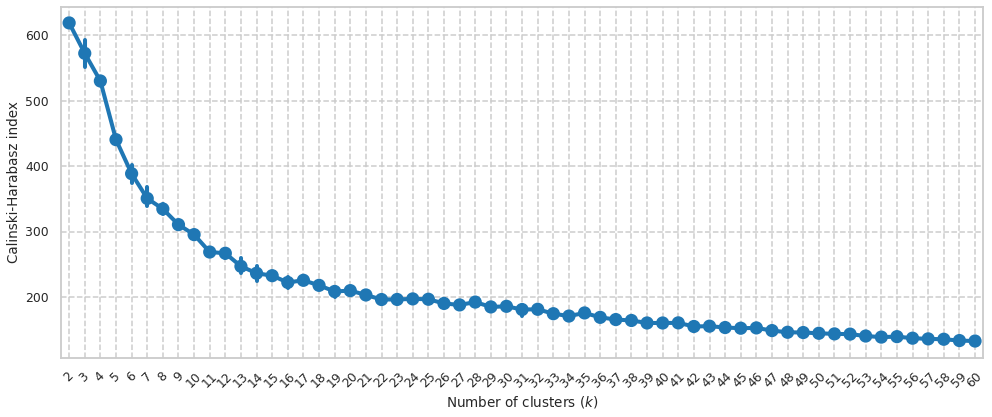

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,...
6    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
4     0.994182
5     0.992584
7     0.944322
10    0.937556
6     0.922867
8     0.911643
3     0.855784
11    0.830593
9     0.798840
12    0.771361
13    0.683191
17    0.626926
15    0.623425
14    0.580949
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.886596,1.000000,0.793980,0.913928,0.886596,0.693142,0.958559,0.793980,0.913928,0.717135
4,1.000000,0.990304,0.990304,0.990304,0.990304,0.990304,0.990304,1.000000,1.000000,1.000000
5,1.000000,1.000000,0.987526,0.987866,1.000000,0.987526,0.987866,0.987526,0.987866,0.999660
6,0.979591,0.983467,0.850934,0.963322,0.965789,0.833657,0.956219,0.860968,0.971600,0.863120


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


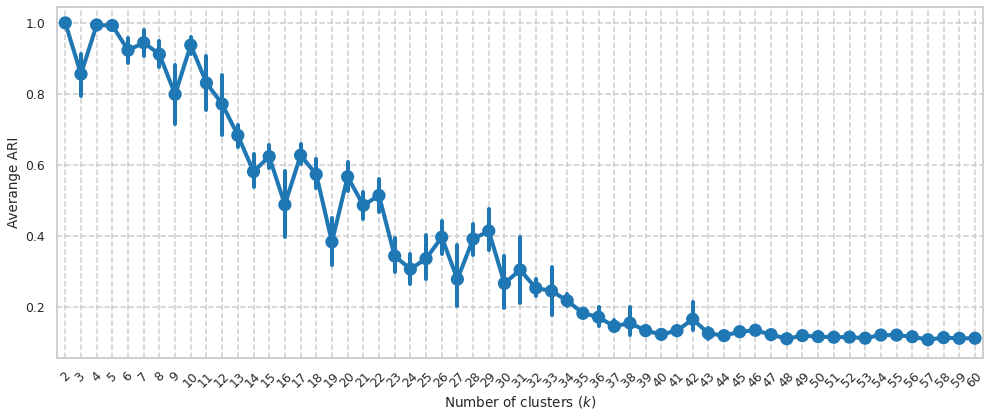

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()